# Starting Off

What hyperparameters do we need to tuning when training neural networks?

## Neural Networks with Keras

Keras is an open-source neural-network library written in Python. It is capable of running on top of TensorFlow, Microsoft Cognitive Toolkit, Theano, or PlaidML. Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible. 

#### Install keras with tensorflow backend

1. https://www.tensorflow.org/install/

In [1]:
#!pip install tensorflow

2. https://keras.io/#installation

In [2]:
#!pip install keras

# Fitting a Model with Keras

## Import  Modules 

In [1]:
# Create first network with Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from keras.optimizers import SGD
import pandas as pd
import numpy


Using TensorFlow backend.


In [2]:
# load pima indians dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv",header=None, delimiter=",")
# split into input (X) and output (Y) variables

In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X = dataset.iloc[:,0:8]
y = dataset.iloc[:,8]

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Define Model
Models in Keras are defined as a sequence of layers.

We create a Sequential model and add layers one at a time until we are happy with our network topology.

## One layer neural network

- **Number of Neurons per layer**

The number of nuerons for the input and output layers are dependent on your data and the task. For hiddne layers, a common practice is to create a funnel with funnel with fewer and fewer neurons per layer.

In general, you will get more bang for your buck by adding on more layers than adding more neurons.

In [5]:
#1-layer network
model = Sequential()

#create first hidden layer
model.add(Dense(12, input_dim=8, activation='relu'))
#Final Layer
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
#compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
#train model
history = model.fit(X_train, # Features
                      y_train, # Target
                      epochs=50, # Number of epochs
                      verbose=1, # Some output
                      batch_size=50, # Number of observations per batch
                      validation_data=(X_test, y_test)) # Data for evaluation

Instructions for updating:
Use tf.cast instead.
Train on 514 samples, validate on 254 samples
Epoch 1/50
514/514 [==============================] - 1s 1ms/step - loss: 6.6951 - acc: 0.4805 - val_loss: 6.4795 - val_acc: 0.4882
Epoch 2/50
514/514 [==============================] - 0s 44us/step - loss: 6.0430 - acc: 0.5253 - val_loss: 5.8864 - val_acc: 0.5039
Epoch 3/50
514/514 [==============================] - 0s 48us/step - loss: 5.7702 - acc: 0.5253 - val_loss: 5.6180 - val_acc: 0.5512
Epoch 4/50
514/514 [==============================] - 0s 44us/step - loss: 5.5135 - acc: 0.5545 - val_loss: 5.4127 - val_acc: 0.5551
Epoch 5/50
514/514 [==============================] - 0s 44us/step - loss: 5.2061 - acc: 0.5584 - val_loss: 5.1993 - val_acc: 0.5748
Epoch 6/50
514/514 [==============================] - 0s 43us/step - loss: 4.8539 - acc: 0.5700 - val_loss: 4.9934 - val_acc: 0.5748
Epoch 7/50
514/514 [==============================] - 0s 44us/step - loss: 4.5306 - acc: 0.5798 - val_loss: 4

## What happens when you change the number of neurons per layer?

## 2-layer neural network


- **Number of Hidden Layers**

For many problems you can start with just one or two hidden layers it will work just fine. For more complex problems, you can gradually ramp up the number of hidden layers until your model starts to over fit. 

Very complex tasks, like image classification, will need dozens of layers.


In [8]:
# 2-layer network
model2 = Sequential()

#create first hidden layer
model2.add(Dense(12, input_dim=8, activation='relu'))
#create second hidden layer
model2.add(Dense(8,activation='relu'))
#Final Layer
model2.add(Dense(1, activation='sigmoid'))

#compile model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
#train 2nd model
history2 = model2.fit(X_train, # Features
                      y_train, # Target
                      epochs=50, # Number of epochs
                      verbose=1, # Some output
                      batch_size=50, # Number of observations per batch
                      validation_data=(X_test, y_test)) # Data for evaluation

Train on 514 samples, validate on 254 samples
Epoch 1/50
514/514 [==============================] - 1s 2ms/step - loss: 8.8820 - acc: 0.3619 - val_loss: 7.4004 - val_acc: 0.3504
Epoch 2/50
514/514 [==============================] - 0s 42us/step - loss: 5.7677 - acc: 0.3560 - val_loss: 5.1705 - val_acc: 0.3780
Epoch 3/50
514/514 [==============================] - 0s 44us/step - loss: 4.6781 - acc: 0.4377 - val_loss: 4.6342 - val_acc: 0.4882
Epoch 4/50
514/514 [==============================] - 0s 36us/step - loss: 4.3746 - acc: 0.4805 - val_loss: 4.2991 - val_acc: 0.4528
Epoch 5/50
514/514 [==============================] - 0s 40us/step - loss: 3.7635 - acc: 0.4416 - val_loss: 4.0005 - val_acc: 0.4134
Epoch 6/50
514/514 [==============================] - 0s 45us/step - loss: 3.4756 - acc: 0.3716 - val_loss: 3.6663 - val_acc: 0.4134
Epoch 7/50
514/514 [==============================] - 0s 47us/step - loss: 3.2246 - acc: 0.4086 - val_loss: 3.3811 - val_acc: 0.4331
Epoch 8/50
514/514 [====

In [24]:
# calculate predictions
predictions = model2.predict(X_test)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,

## What happens when you change the number of layers?

## Neural network with different activation functions

- **[Activation Functions](https://towardsdatascience.com/exploring-activation-functions-for-neural-networks-73498da59b02)**
    - Linear
    - Sigmoid
    - Softmax
    - Tanh
    - ReLu
    - elu
    
In most cases you can use the ReLu activation function (or one of its variants) in the hidden layers. 

For the output layer, the softmax activation function is generally good for multiclass problems and the sigmouid function for binary classificatin problems. For regression tasks, you can simply use no activation function at all.

In [27]:
#3-layer network with sigmoid activation function
model3 = Sequential()

#create first hidden layer
model3.add(Dense(20, input_dim=8, activation='elu'))
#create second hidden layer
model3.add(Dense(10,activation='sigmoid'))
#create third hidden layer
model3.add(Dense(5,activation='sigmoid'))
#Final Layer
model3.add(Dense(1,activation='sigmoid'))

#compile model
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#train 2nd model
history3 = model3.fit(X_train, # Features
                      y_train, # Target
                      epochs=50, # Number of epochs
                      verbose=1, # Some output
                      batch_size=10, # Number of observations per batch
                      validation_data=(X_test, y_test)) # Data for evaluation

Train on 514 samples, validate on 254 samples
Epoch 1/50
514/514 [==============================] - 1s 3ms/step - loss: 0.7007 - acc: 0.6206 - val_loss: 0.6834 - val_acc: 0.6457
Epoch 2/50
514/514 [==============================] - 0s 204us/step - loss: 0.6631 - acc: 0.6459 - val_loss: 0.6695 - val_acc: 0.6457
Epoch 3/50
514/514 [==============================] - 0s 210us/step - loss: 0.6529 - acc: 0.6634 - val_loss: 0.6647 - val_acc: 0.6417
Epoch 4/50
514/514 [==============================] - 0s 200us/step - loss: 0.6451 - acc: 0.6673 - val_loss: 0.6590 - val_acc: 0.6693
Epoch 5/50
514/514 [==============================] - 0s 196us/step - loss: 0.6304 - acc: 0.6634 - val_loss: 0.6631 - val_acc: 0.6850
Epoch 6/50
514/514 [==============================] - 0s 210us/step - loss: 0.6295 - acc: 0.6634 - val_loss: 0.6512 - val_acc: 0.6850
Epoch 7/50
514/514 [==============================] - 0s 194us/step - loss: 0.6266 - acc: 0.6654 - val_loss: 0.6586 - val_acc: 0.7087
Epoch 8/50
514/514

## What happens when you change the activation functions?

## Network with different optimizer and learning rates

- **[Selecting an optimizer](https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/)**
    - Adam
    - SGD
    - RMSprop
    - Adagrad



- **Learning Rate**

    - If you set it too low, training will eventually converge, but it will do so slowly.

    - If you set it too high, it might acutally diverge.

    - If you set it slightly too high, it will converge at first but miss the local optima.


In [11]:
#2-layer network with rmsprop optimizer and a learning rate of .1
model4 = Sequential()

#create first hidden layer
model4.add(Dense(10, input_dim=8, activation='sigmoid'))
#create second hidden layer
model4.add(Dense(10,activation='sigmoid'))
#Final Layer
model4.add(Dense(1, activation='sigmoid'))

#compile model
rmsprop = keras.optimizers.RMSprop(lr=0.1, rho=0.9, epsilon=None, decay=0.0)
model4.compile(loss='binary_crossentropy', optimizer=rmsprop, metrics=['accuracy'])

#train 2nd model
history4 = model4.fit(X_train, # Features
                      y_train, # Target
                      epochs=50, # Number of epochs
                      verbose=1, # Some output
                      batch_size=50, # Number of observations per batch
                      validation_data=(X_test, y_test)) # Data for evaluation

Train on 514 samples, validate on 254 samples
Epoch 1/50
514/514 [==============================] - 1s 2ms/step - loss: 0.7844 - acc: 0.6109 - val_loss: 0.7529 - val_acc: 0.3386
Epoch 2/50
514/514 [==============================] - 0s 38us/step - loss: 0.6602 - acc: 0.6381 - val_loss: 0.6580 - val_acc: 0.6614
Epoch 3/50
514/514 [==============================] - 0s 50us/step - loss: 0.6551 - acc: 0.6459 - val_loss: 0.6422 - val_acc: 0.6614
Epoch 4/50
514/514 [==============================] - 0s 46us/step - loss: 0.6712 - acc: 0.6459 - val_loss: 0.6506 - val_acc: 0.6614
Epoch 5/50
514/514 [==============================] - 0s 44us/step - loss: 0.6567 - acc: 0.6459 - val_loss: 0.6405 - val_acc: 0.6614
Epoch 6/50
514/514 [==============================] - 0s 46us/step - loss: 0.6545 - acc: 0.6459 - val_loss: 0.6407 - val_acc: 0.6614
Epoch 7/50
514/514 [==============================] - 0s 45us/step - loss: 0.6568 - acc: 0.6459 - val_loss: 0.6435 - val_acc: 0.6614
Epoch 8/50
514/514 [====

## What happens when you change the optimizer and learning rates?

- ## Regularization
    - L1 and L2

    - Dropout 
        
        The most popular techniqure for deep neural networks. It is a fairly simple algorithm where at every training step, every neuron has a probability fo being teporarily "droppedout," meaning it will be completely ignored dureing this traing step, but it may be active during the next step.
    
    - [Early Stopping](https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/)
    
   Just interrupt training when its performance on the validation set starts dropping
    
    


[Paper on selecting hyperparameters](https://arxiv.org/pdf/1206.5533v2.pdf)

In [17]:
#3-layer network with sigmoid activation function
model5 = Sequential()

#create first hidden layer
model5.add(Dense(16, input_dim=8, activation='relu'))
# Add a dropout layer for previous hidden layer
model5.add(Dropout(0.50))
# Add fully connected layer with a ReLU activation function and L2 regularization
model5.add(Dense(units=8, kernel_regularizer=regularizers.l2(0.01),activation='relu'))
# Add a dropout layer for previous hidden layer
model5.add(Dropout(0.5))
# Add fully connected layer with a ReLU activation function and L2 regularization
model5.add(Dense(units=4, kernel_regularizer=regularizers.l2(0.01),activation='relu'))
#Final Layer
model5.add(Dense(1,activation='sigmoid'))

#compile model
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model5.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

#train 2nd model
history5 = model5.fit(X_train, # Features
                      y_train, # Target
                      epochs=50, # Number of epochs
                      verbose=1, # Some output
                      batch_size=50, # Number of observations per batch
                      validation_data=(X_test, y_test)) # Data for evaluation

Train on 514 samples, validate on 254 samples
Epoch 1/50
514/514 [==============================] - 1s 3ms/step - loss: 2.5195 - acc: 0.5584 - val_loss: 0.8876 - val_acc: 0.6535
Epoch 2/50
514/514 [==============================] - 0s 73us/step - loss: 2.4412 - acc: 0.5700 - val_loss: 0.8428 - val_acc: 0.6535
Epoch 3/50
514/514 [==============================] - 0s 59us/step - loss: 2.0393 - acc: 0.5642 - val_loss: 0.8307 - val_acc: 0.6614
Epoch 4/50
514/514 [==============================] - 0s 58us/step - loss: 1.6243 - acc: 0.5895 - val_loss: 0.8263 - val_acc: 0.6614
Epoch 5/50
514/514 [==============================] - 0s 61us/step - loss: 1.5180 - acc: 0.6031 - val_loss: 0.8220 - val_acc: 0.6614
Epoch 6/50
514/514 [==============================] - 0s 59us/step - loss: 1.5141 - acc: 0.6128 - val_loss: 0.8179 - val_acc: 0.6614
Epoch 7/50
514/514 [==============================] - 0s 61us/step - loss: 1.3854 - acc: 0.6245 - val_loss: 0.8142 - val_acc: 0.6614
Epoch 8/50
514/514 [====

[Using GridSearchCV to tune Neural Networks](https://chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparameters/)

### Visualize Network Architecture


conda install -c anaconda pydot 

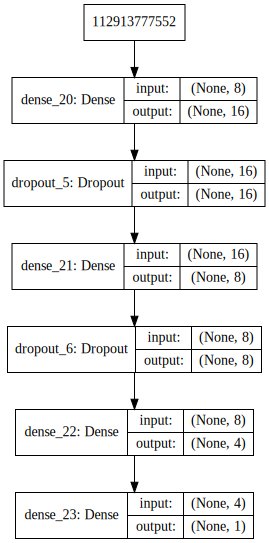

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model


#Visualize network architecture
SVG(model_to_dot(model5, show_shapes=True).create(prog='dot', format='svg'))


In [14]:
# Save the visualization as a file
plot_model(model5, show_shapes=True, to_file='network.png')

https://chrisalbon.com/deep_learning/keras/visualize_neural_network_architecture/

[Keras Implementation of optimizers](https://keras.io/optimizers/)

[Impact of Learning Rate on Model Performance](https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/)

In [20]:
# calculate predictions
predictions = model5.predict(X_test)
predictions

array([[0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],
       [0.4075755],


In [19]:



# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [ ]:
import matplotlib.pyplot as plt

# Get training and test loss histories
training_loss = history5.history['loss']
test_loss = history5.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

https://chrisalbon.com/deep_learning/keras/visualize_loss_history/

In [21]:
# Get training and test accuracy histories
training_accuracy = history5.history['acc']
test_accuracy = history5.history['val_acc']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize accuracy history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.show();

NameError: name 'plt' is not defined

https://chrisalbon.com/deep_learning/keras/visualize_performance_history/

In [22]:
# calculate predictions
predictions = model5.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

## Resources 

http://neuralnetworksanddeeplearning.com/
    
http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/

https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi